<a href="https://colab.research.google.com/github/jscienciadados/visualizacao-dados-plotly/blob/main/05_Heatmaps_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color='blue'>Visualização de Dados e Design de Dashboards</font>
## <font color='blue'>Capítulo 2 - Métodos de Visualização</font>

## Exemplos de Heatmaps e Wordcloud

## Pacotes Python Para Manipulação de Dados e Visualização

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Pacote wordcloud
!pip install -q wordcloud

In [3]:
# Manipulação de Dados
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# Wordcloud
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science " --iversions

Author: Data Science 

plotly    : 4.4.1
IPython   : 5.5.0
wordcloud : 1.5.0
pandas    : 1.1.5
matplotlib: 3.2.2
numpy     : 1.19.5



## Carregando os Dados

In [6]:
# Carrega os dados
titanic = pd.read_csv('dados/titanic-train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
# Carrega os dados
covid = pd.read_csv('dados/novel-corona-virus-2019-dataset-covid_19_data.csv')
covid.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [7]:
# Carrega os dados
world = pd.read_csv('dados/world-university-rankings-cwurData.csv')
world.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Heatmap

**Objetivo** : Exibir mapa de calor de variáveis quantitativas com uma variável numérica densa.

Como variam os preços dos bilhetes para todos os passageiros de diferentes sexos e portos de embarque no Titanic?

In [9]:
# Figura
fig = go.Figure(data = go.Heatmap(z = titanic['Fare'],
                                  x = titanic['Sex'],
                                  y = titanic['Embarked'],
                                  hoverongaps = False))

# Layout
fig.update_layout(title = 'Heatmap Preço do Ticket x Gênero de Passageiros do Titanic Por Porto de Embarque',
                  xaxis_title = "Genêro",
                  yaxis_title = "Porto de Embarque")

# Gráfico
fig.show()

### Heatmap Date Axis

**Objetivo** : Exibir mapa de calor de várias séries temporais. 

Quantas mortes suspeitas de Covid ocorreram no Brasil, EUA e Canada no mês anterior?

In [10]:
# Prepara os dados
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

days_before = (date.today() - timedelta(days = 360)).isoformat()

last_month_df = covid[(covid['ObservationDate'] > days_before) & ((covid['Country/Region']=='US') | (covid['Country/Region']=='Brazil') | (covid['Country/Region']=='Canada'))]

country = last_month_df['Country/Region'].unique()

dates = pd.to_datetime(last_month_df['ObservationDate'].unique())

num_deaths=[]

for i in country:
    num_deaths.append(last_month_df[last_month_df['Country/Region']==i][['ObservationDate','Deaths']].groupby('ObservationDate').sum().reset_index()['Deaths'])


In [11]:
# Figura
fig = go.Figure(data = go.Heatmap(z = num_deaths,
                                  x = dates,
                                  y = country,
                                  colorscale = 'Viridis'))

# Layout
fig.update_layout(title = 'Mortes Por Suspeita de Covid nos Últimos 30 Dias', xaxis_nticks = 30)

# Gráfico
fig.show()

### Imshow

**Objetivo** : Exibir mapa de calor de variáveis quantitativas com uma variável numérica como densa (semelhante ao heatmap).

Qual a variação média dos preços dos bilhetes para passageiros de diferentes sexos e seu porto de embarque?

In [13]:
# Prepara os dados
emb_male = []

for i in titanic['Embarked'].unique():
    emb_male.append(titanic[(titanic['Sex']=='male') & (titanic['Embarked']==i)]['Fare'].mean())
    
emb_female = []

for j in titanic['Embarked'].unique():
    emb_female.append(titanic[(titanic['Sex']=='female') & (titanic['Embarked']==j)]['Fare'].mean())

emb = [emb_male,emb_female]

In [18]:
# Figura
fig = px.imshow(emb,
                labels = dict(x = "Porto de Embarque", y = "Gênero", color = "Valor Médio do Ticket"),
                x = titanic['Embarked'].unique(), 
                y = titanic['Sex'].unique())

# Eixos
fig.update_xaxes(side = "top")

# Gráfico
fig.show()

### Wordcloud

**Objetivo** : Exibir as palavras de uma coluna com o tamanho representando a frequência.

Quais países tem mais universidades avaliadas no dataset de avaliações de universidades?

In [15]:
# Colunas
world.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [17]:
# Extrai a coluna com os países
df = world.country
df.head(10)

0               USA
1               USA
2               USA
3    United Kingdom
4               USA
5               USA
6    United Kingdom
7               USA
8               USA
9               USA
Name: country, dtype: object

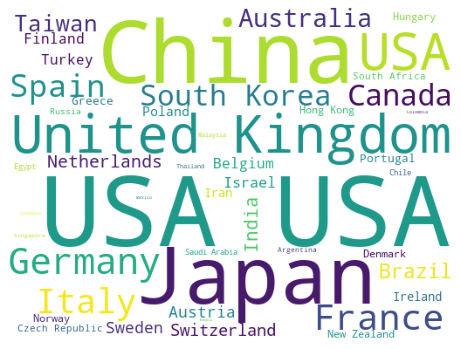

In [18]:
# Figura
plt.subplots(figsize = (8,8))

# Wordcloud
wordcloud = WordCloud(background_color = 'white',
                      width = 512,
                      height = 384).generate(' '.join(df))

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# Fim